# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [34]:
# use these links to do so:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import os


In [35]:
Churn_data = pd.read_csv('Churn.csv')

In [36]:
Churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

In [37]:
Churn_data.shape

(7043, 21)

In [38]:
Churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [39]:
#Checking if any values in the variables are null 
Churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [40]:
Churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Data Manipulation

In [41]:
#Removing missing values 
Churn_data.dropna(inplace = True)

In [42]:
#Remove customer IDs from the data set
Churn_data1 = Churn_data.iloc[:,1:]

In [43]:
#Converting the target variable in a numeric variable
Churn_data1['Churn'].replace(to_replace='Yes', value=1, inplace=True)
Churn_data1['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [44]:
#Replacing spaces with null values in total charges column
Churn_data1['TotalCharges'] = Churn_data1["TotalCharges"].replace(" ",np.nan)

In [45]:
#Dropping null values from total charges column which contain .15% missing data 
Churn_data1 =Churn_data1[Churn_data["TotalCharges"].notnull()]
Churn_data1 = Churn_data1.reset_index()[Churn_data1.columns]

In [46]:
#convert to float type
Churn_data1["TotalCharges"] = Churn_data1["TotalCharges"].astype(float)

In [47]:
#replace values
Churn_data1["TotalCharges"] = Churn_data1["TotalCharges"].replace("nan",0)

In [48]:
Churn_data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [18]:
#analysing data like
#GOAL : 2 classes Churners and non-Churners
#which features are the driving factors for churn

In [19]:
#checking the distribution of variables-normal distrubition(-1.96 to +1.96)
from scipy import stats

In [30]:
print(Churn_data1.corr())

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen        1.000000  0.016567        0.220173      0.102411   
tenure               0.016567  1.000000        0.247900      0.825880   
MonthlyCharges       0.220173  0.247900        1.000000      0.651065   
TotalCharges         0.102411  0.825880        0.651065      1.000000   
Churn                0.150889 -0.352229        0.193356     -0.199484   

                   Churn  
SeniorCitizen   0.150889  
tenure         -0.352229  
MonthlyCharges  0.193356  
TotalCharges   -0.199484  
Churn           1.000000  


In [31]:
#conclusion: we can see the Normality for PhoneService calls is not statisfied

### Data Visualization

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'Female'

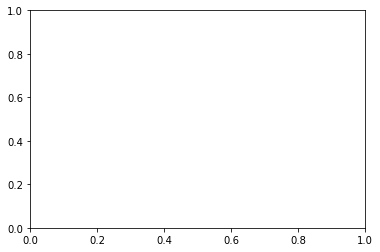

In [32]:
#checking the Gender distribution- it is normal
print(sns.distplot([Churn_data1.gender]))

In [1]:
### Conclusion: What all did you understand from the above charts

### Implement Machine Learning Models

### Model Evaluation

### Final Conclusions